## 损失函数


#### 均方误差

In [17]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

r = mean_squared_error(np.array(y),np.array(t))
print(r)




0.09750000000000003


#### 交叉熵误差

In [27]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

y2 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
t2 = [0,0,1,0,0,0,0,0,0,0]
r2 = cross_entropy_error(np.array(y2),np.array(t2))
print(r2)



2.302584092994546


#### mini batch 版本交叉熵误差



In [52]:

import  sys,os
import numpy as np

#sys.path.append(os.pardir)
from keras.datasets import mnist

(x_train,t_train),(x_test,t_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1)

train_size = x_train.shape[0]
batch_size = 5
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

def croass_entropy_error_batch(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size,t)]+1e-7))/batch_size

print([np.arange(batch_size),t_batch])
print(x_batch)



[array([0, 1, 2, 3, 4]), array([0, 8, 4, 2, 0], dtype=uint8)]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 导数和微分


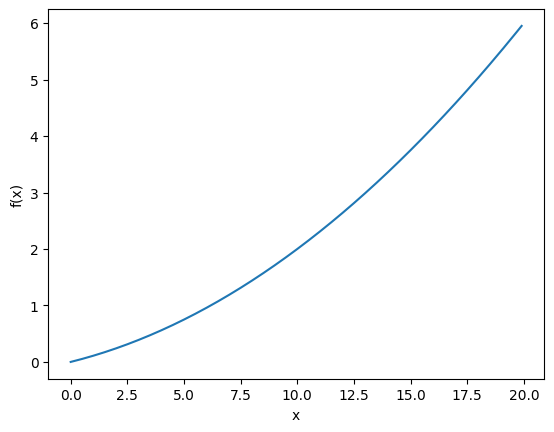

0.1999999999990898


In [54]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5))

In [55]:
def function_2(x):
    return np.sum(x**2)

def function_tmp1(x0):
    return x0*x0 + 4**2

numerical_diff(function_tmp1,3.0)

def function_tmp2(x1):
    return 3**2 + x1*x1

numerical_diff(function_tmp2,4.0)



7.999999999999119

### 梯度

In [80]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h 
        fxh1 = f(x)

        x[idx] = tmp_val -h 
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    
    return grad
        
numerical_gradient(function_2,np.array([3.0,4.0]))

25.00060001 24.99940001
25.00080001 24.99920001


array([6., 8.])